In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
# Define colors for ["ProtoNet", "MatchingNet", "MAML", "RelationNet"]
colors = {
    "ProtoNet": "#1f77b4",
    "MatchingNet": "#ff7f0e",
    "MAML": "#2ca02c",
    "RelationNet": "#d62728",
}

In [53]:
header = ["timestamp", "dataset", "name", "split", "acc_mean", "acc_std", "n_way", "n_shot", "n_query"]
df = pd.read_csv("./../results.csv", names=header, header=0)
df.head()

,timestamp,dataset,name,split,acc_mean,acc_std,n_way,n_shot,n_query
0,20231208-225716,tabula_muris,protonet_5w_1s,train,92.093333,9.225899,5,1,15
1,20231208-225716,tabula_muris,protonet_5w_1s,val,81.380000,12.343991,5,1,15
2,20231208-225716,tabula_muris,protonet_5w_1s,test,81.153333,11.620680,5,1,15
3,20231208-230011,tabula_muris,protonet_5w_5s,train,98.342222,2.757601,5,5,15
4,20231208-230011,tabula_muris,protonet_5w_5s,val,89.228889,7.458193,5,5,15


In [54]:
# Take all the results for tabula_muris on the test split
t_test = df[(df["dataset"] == "tabula_muris") & (df["split"] == "test")]
t_test.head()

,timestamp,dataset,name,split,acc_mean,acc_std,n_way,n_shot,n_query
2,20231208-225716,tabula_muris,protonet_5w_1s,test,81.153333,11.620680,5,1,15
5,20231208-230011,tabula_muris,protonet_5w_5s,test,89.300000,7.533555,5,5,15
8,20231208-230306,tabula_muris,protonet_5w_10s,test,90.406667,7.017900,5,10,15
11,20231208-230603,tabula_muris,protonet_5w_20s,test,91.371111,6.571660,5,20,15
14,20231208-230900,tabula_muris,protonet_5w_30s,test,89.773333,7.063869,5,30,15


In [55]:
t_test[t_test["name"].str.endswith("conc_sum_7lg_2lf")]

,timestamp,dataset,name,split,acc_mean,acc_std,n_way,n_shot,n_query
119,20231209-074307,tabula_muris,relationnet_5w_1s_fc-conc_sum_7lg_2lf,test,70.586667,13.178191,5,1,15
122,20231209-074601,tabula_muris,relationnet_5w_5s_fc-conc_sum_7lg_2lf,test,80.680000,10.305545,5,5,15
125,20231209-074850,tabula_muris,relationnet_5w_10s_fc-conc_sum_7lg_2lf,test,81.235556,10.084792,5,10,15
128,20231209-075153,tabula_muris,relationnet_5w_20s_fc-conc_sum_7lg_2lf,test,83.553333,9.029608,5,20,15
131,20231209-075439,tabula_muris,relationnet_5w_30s_fc-conc_sum_7lg_2lf,test,78.604444,10.711668,5,30,15
134,20231209-075724,tabula_muris,relationnet_5w_40s_fc-conc_sum_7lg_2lf,test,81.324444,8.972381,5,40,15
137,20231209-080017,tabula_muris,relationnet_5w_50s_fc-conc_sum_7lg_2lf,test,77.542222,9.562469,5,50,15
140,20231209-080315,tabula_muris,relationnet_5w_70s_fc-conc_sum_7lg_2lf,test,81.055556,9.230699,5,70,15
143,20231209-080611,tabula_muris,relationnet_5w_90s_fc-conc_sum_7lg_2lf,test,81.113333,10.100336,5,90,15
146,20231209-080902,tabula_muris,relationnet_10w_5s_fc-conc_sum_7lg_2lf,test,64.492222,8.056280,10,5,15


In [56]:
# in the name column, we take all of them, but for the ones that begin with "relationnet_" we only keep those that end with "fc-conc_sum_7lg_2lf"
t_test_all = t_test[~t_test["name"].str.startswith("relationnet_")]
# Now we only keep the ones that end with "fc-conc_sum_7lg_2lf"
t_test_all = t_test_all[t_test_all["name"].str.endswith("fc-conc_sum_7lg_2lf")]
t_test_all.head()

,timestamp,dataset,name,split,acc_mean,acc_std,n_way,n_shot,n_query


In [57]:
# in the name column, we take all but for the ones that begin with "relationnet_", we only keep those that end with "fc-conc_sum_7lg_2lf"
t_test_all = t_test[~t_test["name"].str.startswith("relationnet_")]
t_test_relationnet = t_test[t_test["name"].str.endswith("fc-conc_sum_7lg_2lf")]
# We concatenate the two dataframes
t_test = pd.concat([t_test_all, t_test_relationnet])
# Remove the last element in the frame
t_test = t_test[:-1]
t_test.head(100)

,timestamp,dataset,name,split,acc_mean,acc_std,n_way,n_shot,n_query
2,20231208-225716,tabula_muris,protonet_5w_1s,test,81.153333,11.620680,5,1,15
5,20231208-230011,tabula_muris,protonet_5w_5s,test,89.300000,7.533555,5,5,15
8,20231208-230306,tabula_muris,protonet_5w_10s,test,90.406667,7.017900,5,10,15
11,20231208-230603,tabula_muris,protonet_5w_20s,test,91.371111,6.571660,5,20,15
14,20231208-230900,tabula_muris,protonet_5w_30s,test,89.773333,7.063869,5,30,15
17,20231208-231152,tabula_muris,protonet_5w_40s,test,90.682222,6.371910,5,40,15
20,20231208-231443,tabula_muris,protonet_5w_50s,test,89.937778,6.980331,5,50,15
23,20231208-231741,tabula_muris,protonet_5w_70s,test,90.393333,7.023724,5,70,15
26,20231208-232047,tabula_muris,protonet_5w_90s,test,89.973333,6.883531,5,90,15
29,20231208-232341,tabula_muris,protonet_10w_5s,test,82.326667,6.416988,10,5,15


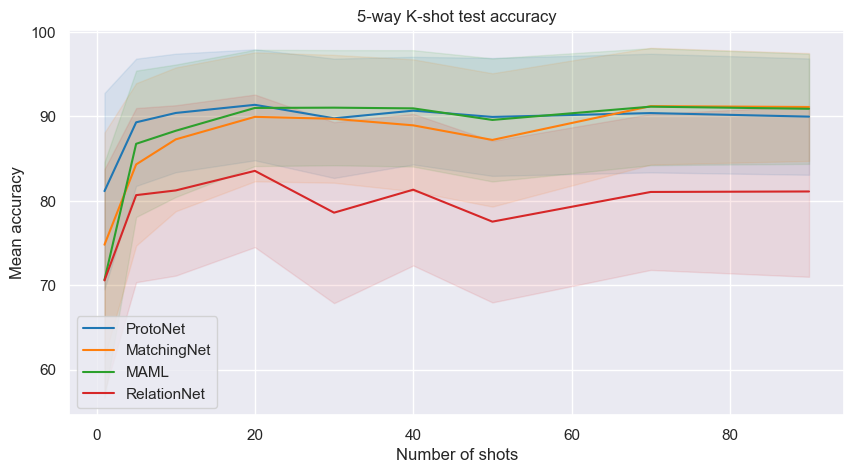

In [74]:
ALPHA=0.1

# We make a plot for wich the ways=5, and the shots vary
plt.figure(figsize=(10, 5))
sns.set(style="darkgrid")
for name in ["ProtoNet", "MatchingNet", "MAML", "RelationNet"]:
    data = t_test[t_test["name"].str.startswith(name.lower()) & (t_test["n_way"] == 5)]
    sns.lineplot(x="n_shot", y="acc_mean", data=data, label=name, color=colors[name])
    # We fill between with the acc_std
    plt.fill_between(data['n_shot'], data['acc_mean'] - data['acc_std'], data['acc_mean'] + data['acc_std'], alpha=ALPHA, color=colors[name])
plt.ylabel('Mean accuracy')
plt.xlabel('Number of shots')
plt.title('5-way K-shot test accuracy')
plt.savefig('../plots/5-way_K-shot_test_accuracy.png', dpi=300)
plt.show()

In [59]:
t_test[t_test["name"].str.startswith("relatio".lower()) & (t_test["n_shot"] == 5)]

,timestamp,dataset,name,split,acc_mean,acc_std,n_way,n_shot,n_query
122,20231209-074601,tabula_muris,relationnet_5w_5s_fc-conc_sum_7lg_2lf,test,80.680000,10.305545,5,5,15
146,20231209-080902,tabula_muris,relationnet_10w_5s_fc-conc_sum_7lg_2lf,test,64.492222,8.056280,10,5,15
149,20231209-081155,tabula_muris,relationnet_20w_5s_fc-conc_sum_7lg_2lf,test,52.816667,5.337125,20,5,15
152,20231209-081457,tabula_muris,relationnet_30w_5s_fc-conc_sum_7lg_2lf,test,45.577778,3.076420,30,5,15
155,20231209-081805,tabula_muris,relationnet_40w_5s_fc-conc_sum_7lg_2lf,test,38.957099,2.333304,40,5,15
158,20231209-082126,tabula_muris,relationnet_50w_5s_fc-conc_sum_7lg_2lf,test,31.070679,1.996717,50,5,15


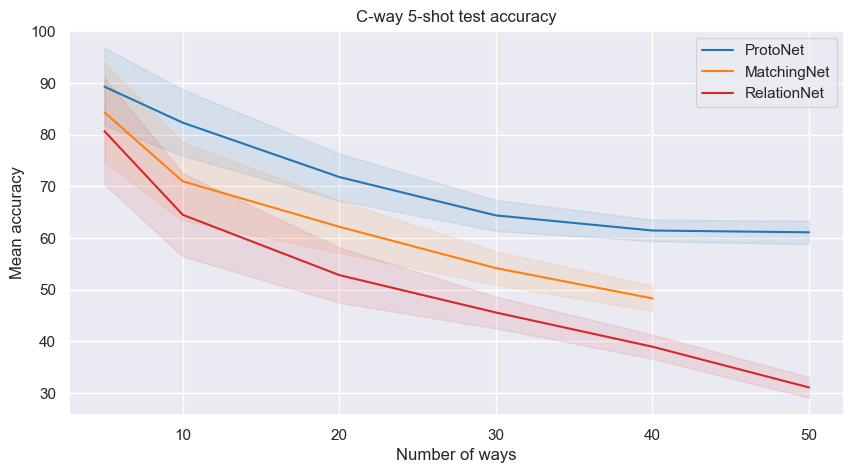

In [79]:
# Now we do the same but shots=5 and ways vary
plt.figure(figsize=(10, 5))
sns.set(style="darkgrid")
for name in ["ProtoNet", "MatchingNet", "RelationNet"]:
    data = t_test[t_test["name"].str.startswith(name.lower()) & (t_test["n_shot"] == 5)]
    sns.lineplot(x="n_way", y="acc_mean", data=data, label=name, color=colors[name])
    # We fill between with the acc_std
    plt.fill_between(data['n_way'], data['acc_mean'] - data['acc_std'], data['acc_mean'] + data['acc_std'], alpha=ALPHA, color=colors[name])
plt.ylabel('Mean accuracy')
plt.xlabel('Number of ways')
plt.title('C-way 5-shot test accuracy')
plt.savefig('../plots/C-way_5-shot_test_accuracy.png', dpi=300)
plt.show()

In [66]:
# Now we do the same, but for the swissprot dataset
s_test = df[(df["dataset"] == "swissprot") & (df["split"] == "test")]
s_test.head()

,timestamp,dataset,name,split,acc_mean,acc_std,n_way,n_shot,n_query
281,20231209-144147,swissprot,protonet_5w_1s,test,52.964444,11.766125,5,1,15
284,20231209-144505,swissprot,protonet_5w_5s,test,61.086667,7.658733,5,5,15
287,20231209-144807,swissprot,protonet_5w_10s,test,64.680000,5.943422,5,10,15
290,20231209-145054,swissprot,protonet_5w_20s,test,69.951111,5.548224,5,20,15
293,20231209-145331,swissprot,protonet_5w_30s,test,69.920000,5.244776,5,30,15


In [68]:
s_test_all = s_test[~s_test["name"].str.startswith("relationnet_")]
s_test_relationnet = s_test[s_test["name"].str.endswith("fc-conc_sum_7lg_2lf")]
s_test = pd.concat([s_test_all, s_test_relationnet])
s_test = s_test[:-1]
s_test.head(100)

,timestamp,dataset,name,split,acc_mean,acc_std,n_way,n_shot,n_query
281,20231209-144147,swissprot,protonet_5w_1s,test,52.964444,1.176613e+01,5,1,15
284,20231209-144505,swissprot,protonet_5w_5s,test,61.086667,7.658733e+00,5,5,15
287,20231209-144807,swissprot,protonet_5w_10s,test,64.680000,5.943422e+00,5,10,15
290,20231209-145054,swissprot,protonet_5w_20s,test,69.951111,5.548224e+00,5,20,15
293,20231209-145331,swissprot,protonet_5w_30s,test,69.920000,5.244776e+00,5,30,15
296,20231209-145602,swissprot,protonet_5w_40s,test,65.244444,6.339578e+00,5,40,15
299,20231209-145828,swissprot,protonet_5w_50s,test,66.647222,6.057181e+00,5,50,15
302,20231209-150050,swissprot,protonet_5w_70s,test,72.277778,7.107421e+00,5,70,15
305,20231209-150309,swissprot,protonet_5w_90s,test,90.583333,5.735893e+00,5,90,15
308,20231209-150628,swissprot,protonet_10w_5s,test,53.679012,4.968795e+00,10,5,15


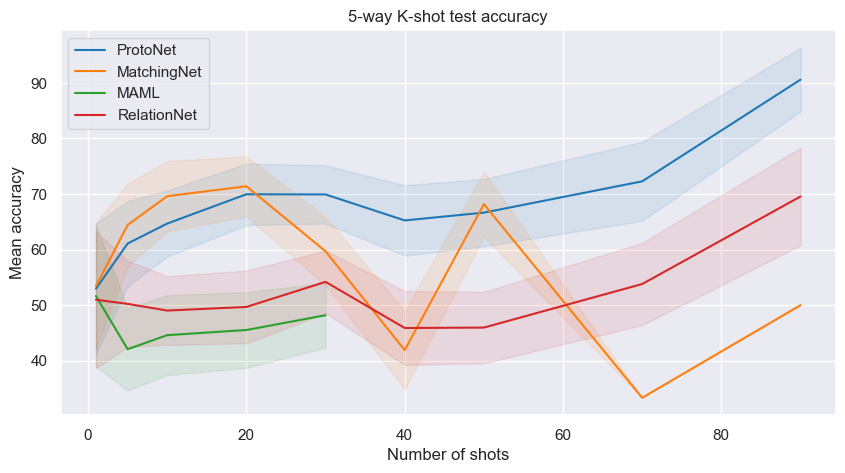

In [76]:
ALPHA=0.1

# We make a plot for wich the ways=5, and the shots vary
plt.figure(figsize=(10, 5))
sns.set(style="darkgrid")
for name in ["ProtoNet", "MatchingNet", "MAML", "RelationNet"]:
    data = s_test[s_test["name"].str.startswith(name.lower()) & (s_test["n_way"] == 5)]
    sns.lineplot(x="n_shot", y="acc_mean", data=data, label=name, color=colors[name])
    # We fill between with the acc_std
    plt.fill_between(data['n_shot'], data['acc_mean'] - data['acc_std'], data['acc_mean'] + data['acc_std'], alpha=ALPHA, color=colors[name])
plt.ylabel('Mean accuracy')
plt.xlabel('Number of shots')
plt.title('5-way K-shot test accuracy')
plt.savefig('../plots/5-way_K-shot_test_accuracy_swissprot.png', dpi=300)
plt.show()

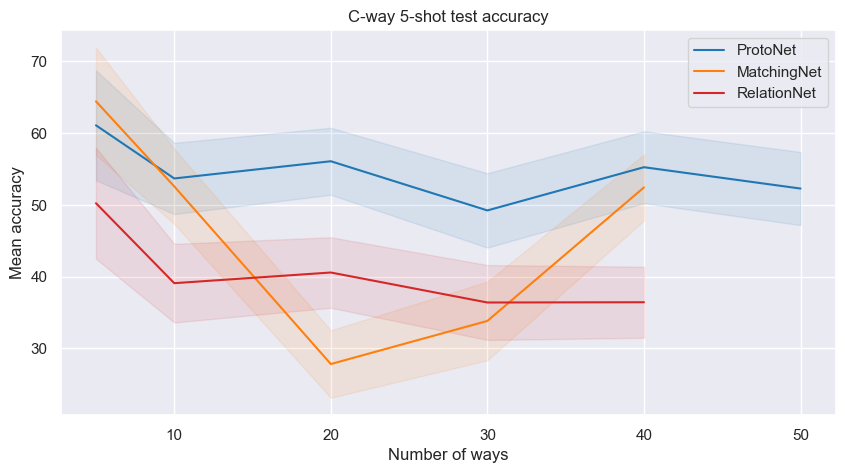

In [78]:
# Now we do the same but shots=5 and ways vary
plt.figure(figsize=(10, 5))
sns.set(style="darkgrid")
for name in ["ProtoNet", "MatchingNet", "RelationNet"]:
    data = s_test[s_test["name"].str.startswith(name.lower()) & (s_test["n_shot"] == 5)]
    sns.lineplot(x="n_way", y="acc_mean", data=data, label=name, color=colors[name])
    # We fill between with the acc_std
    plt.fill_between(data['n_way'], data['acc_mean'] - data['acc_std'], data['acc_mean'] + data['acc_std'], alpha=ALPHA, color=colors[name])
plt.ylabel('Mean accuracy')
plt.xlabel('Number of ways')
plt.title('C-way 5-shot test accuracy')
plt.savefig('../plots/C-way_5-shot_test_accuracy_swissprot.png', dpi=300)
plt.show()